In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import gzip

In [9]:
#predicted_labels = np.load("./ndsb_dataset_nounk/predicted_labels_nounk.npy")
predicted_labels= np.load("./experimentos/transfer_laps_cnn_079_ndsb_nounk/predicted_labels_valid_ftteste3.npy")
#print(np.shape(predicted_labels))
#predicted_labels = np.argmax(predictions, axis=1)

#real_labels = np.load("./ndsb_dataset_nounk/real_labels_nounk.npy")
real = np.load("./experimentos/transfer_laps_cnn_079_ndsb_nounk/real_labels_valid_ftteste3.npy")
real_labels = np.argmax(real, axis=1)

#measures = np.load("focus_measure_ndsb_nounk.npy")
measures = np.load("focus_valid_laps.npy")

train_path = "./laps_nobg_100/images_train.npy.gz"
#labels_path = "./laps_nobg_100/labels_train.npy.gz"
#with gzip.open(labels_path, "rb") as f:
#    labels = np.load(f)

#train_idx = np.load("./laps_nobg_100/indices_train.npy")
valid_idx = np.load("./laps_nobg_100/indices_valid.npy")

with gzip.open(train_path, "rb") as f:
    imgs = np.load(f)
    
img_valid = imgs[valid_idx]

(518,)


In [10]:
data = pd.DataFrame({'real':real_labels, 'predicted':predicted_labels, 'lapv':measures[:,0], 'lapm':measures[:,1], 'teng':measures[:,2], 'gblvar':measures[:,3], 'totvar':measures[:,4]})

data.head()

,gblvar,lapm,lapv,predicted,real,teng,totvar
0,0.078619,0.062546,0.038825,3,3,0.636660,7835.740039
1,0.024910,0.043574,0.003948,13,7,0.112697,8489.485862
2,0.005880,0.070231,0.015677,11,17,0.040518,8795.167319
3,0.035273,0.060877,0.014352,1,1,0.198906,8415.278765
4,0.010457,0.039253,0.005078,17,17,0.142213,8710.637350


In [11]:
measures_log = np.log(measures)

data_log = pd.DataFrame({'real':real_labels, 'predicted':predicted_labels, 'lapv':measures_log[:,0], 'lapm':measures_log[:,1], 'teng':measures_log[:,2], 'gblvar':measures_log[:,3], 'totvar':measures_log[:,4]})

In [ ]:
true_false = np.zeros(len(real_labels), dtype=int)
for i in range(len(real_labels)):
    if predicted_labels[i] == real_labels[i]:
        true_false[i] = 1

C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


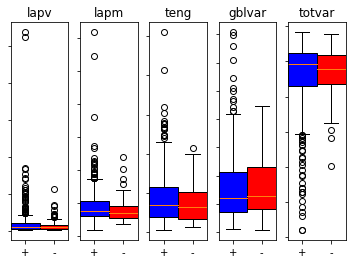

In [12]:
f, a = plt.subplots(1,5, sharex=False, sharey=False)
names = ['lapv', 'lapm', 'teng', 'gblvar', 'totvar']
colors = ['blue', 'red']

i=0
for name in names:
    box_true = data[data['predicted'] == data['real']][name]
    box_false = data[data['predicted'] != data['real']][name]
    bplot = a[i].boxplot([box_true, box_false], widths=1, labels=['+', '-'],patch_artist=True)
    a[i].set_title(name)
    a[i].get_yaxis().set_ticklabels('')
    i = i+1
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
    
f.subplots_adjust(hspace=0)

plt.show()


C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


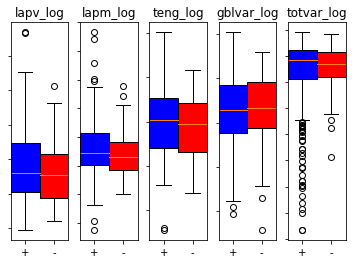

In [13]:
f, a = plt.subplots(1,5, sharex=False, sharey=False)
names = ['lapv', 'lapm', 'teng', 'gblvar', 'totvar']

i=0
for name in names:
    box_true = data_log[data_log['predicted'] == data_log['real']][name]
    box_false = data_log[data_log['predicted'] != data_log['real']][name]
    bplot = a[i].boxplot([box_true, box_false], widths=1, labels=['+', '-'],patch_artist=True)
    a[i].set_title(name + '_log')
    a[i].get_yaxis().set_ticklabels('')
    i = i+1
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

    
f.subplots_adjust(hspace=0)

plt.show()

In [14]:
def show_images(images, cols = 1, titles = None):
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title, fontsize=40)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

In [74]:
#titles = measures_log[40:60,2].round(decimals=4)
#images = img_valid[40:60]
#show_images(images[0:10], 1, titles[0:10].round(decimals=3))


In [40]:
classe = 0

C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


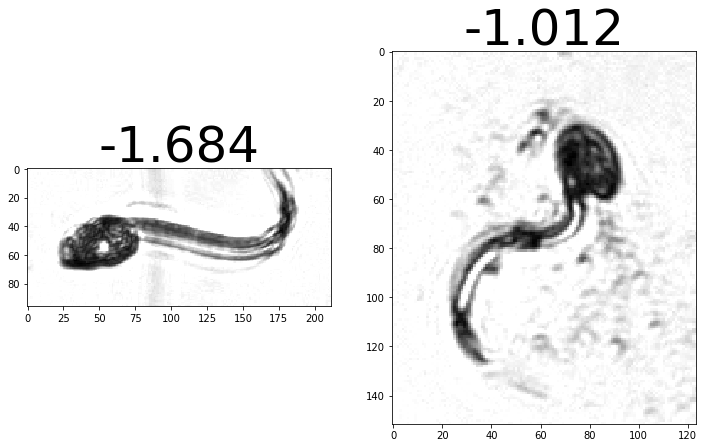

In [41]:
titles = data_log[data_log['predicted'] != classe][data_log['real'] == classe]['teng']
index = data_log[data_log['predicted'] != classe][data_log['real'] == classe].index
images = img_valid[index]
show_images(images[0:10], 1, titles[0:10].round(decimals=3))

C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


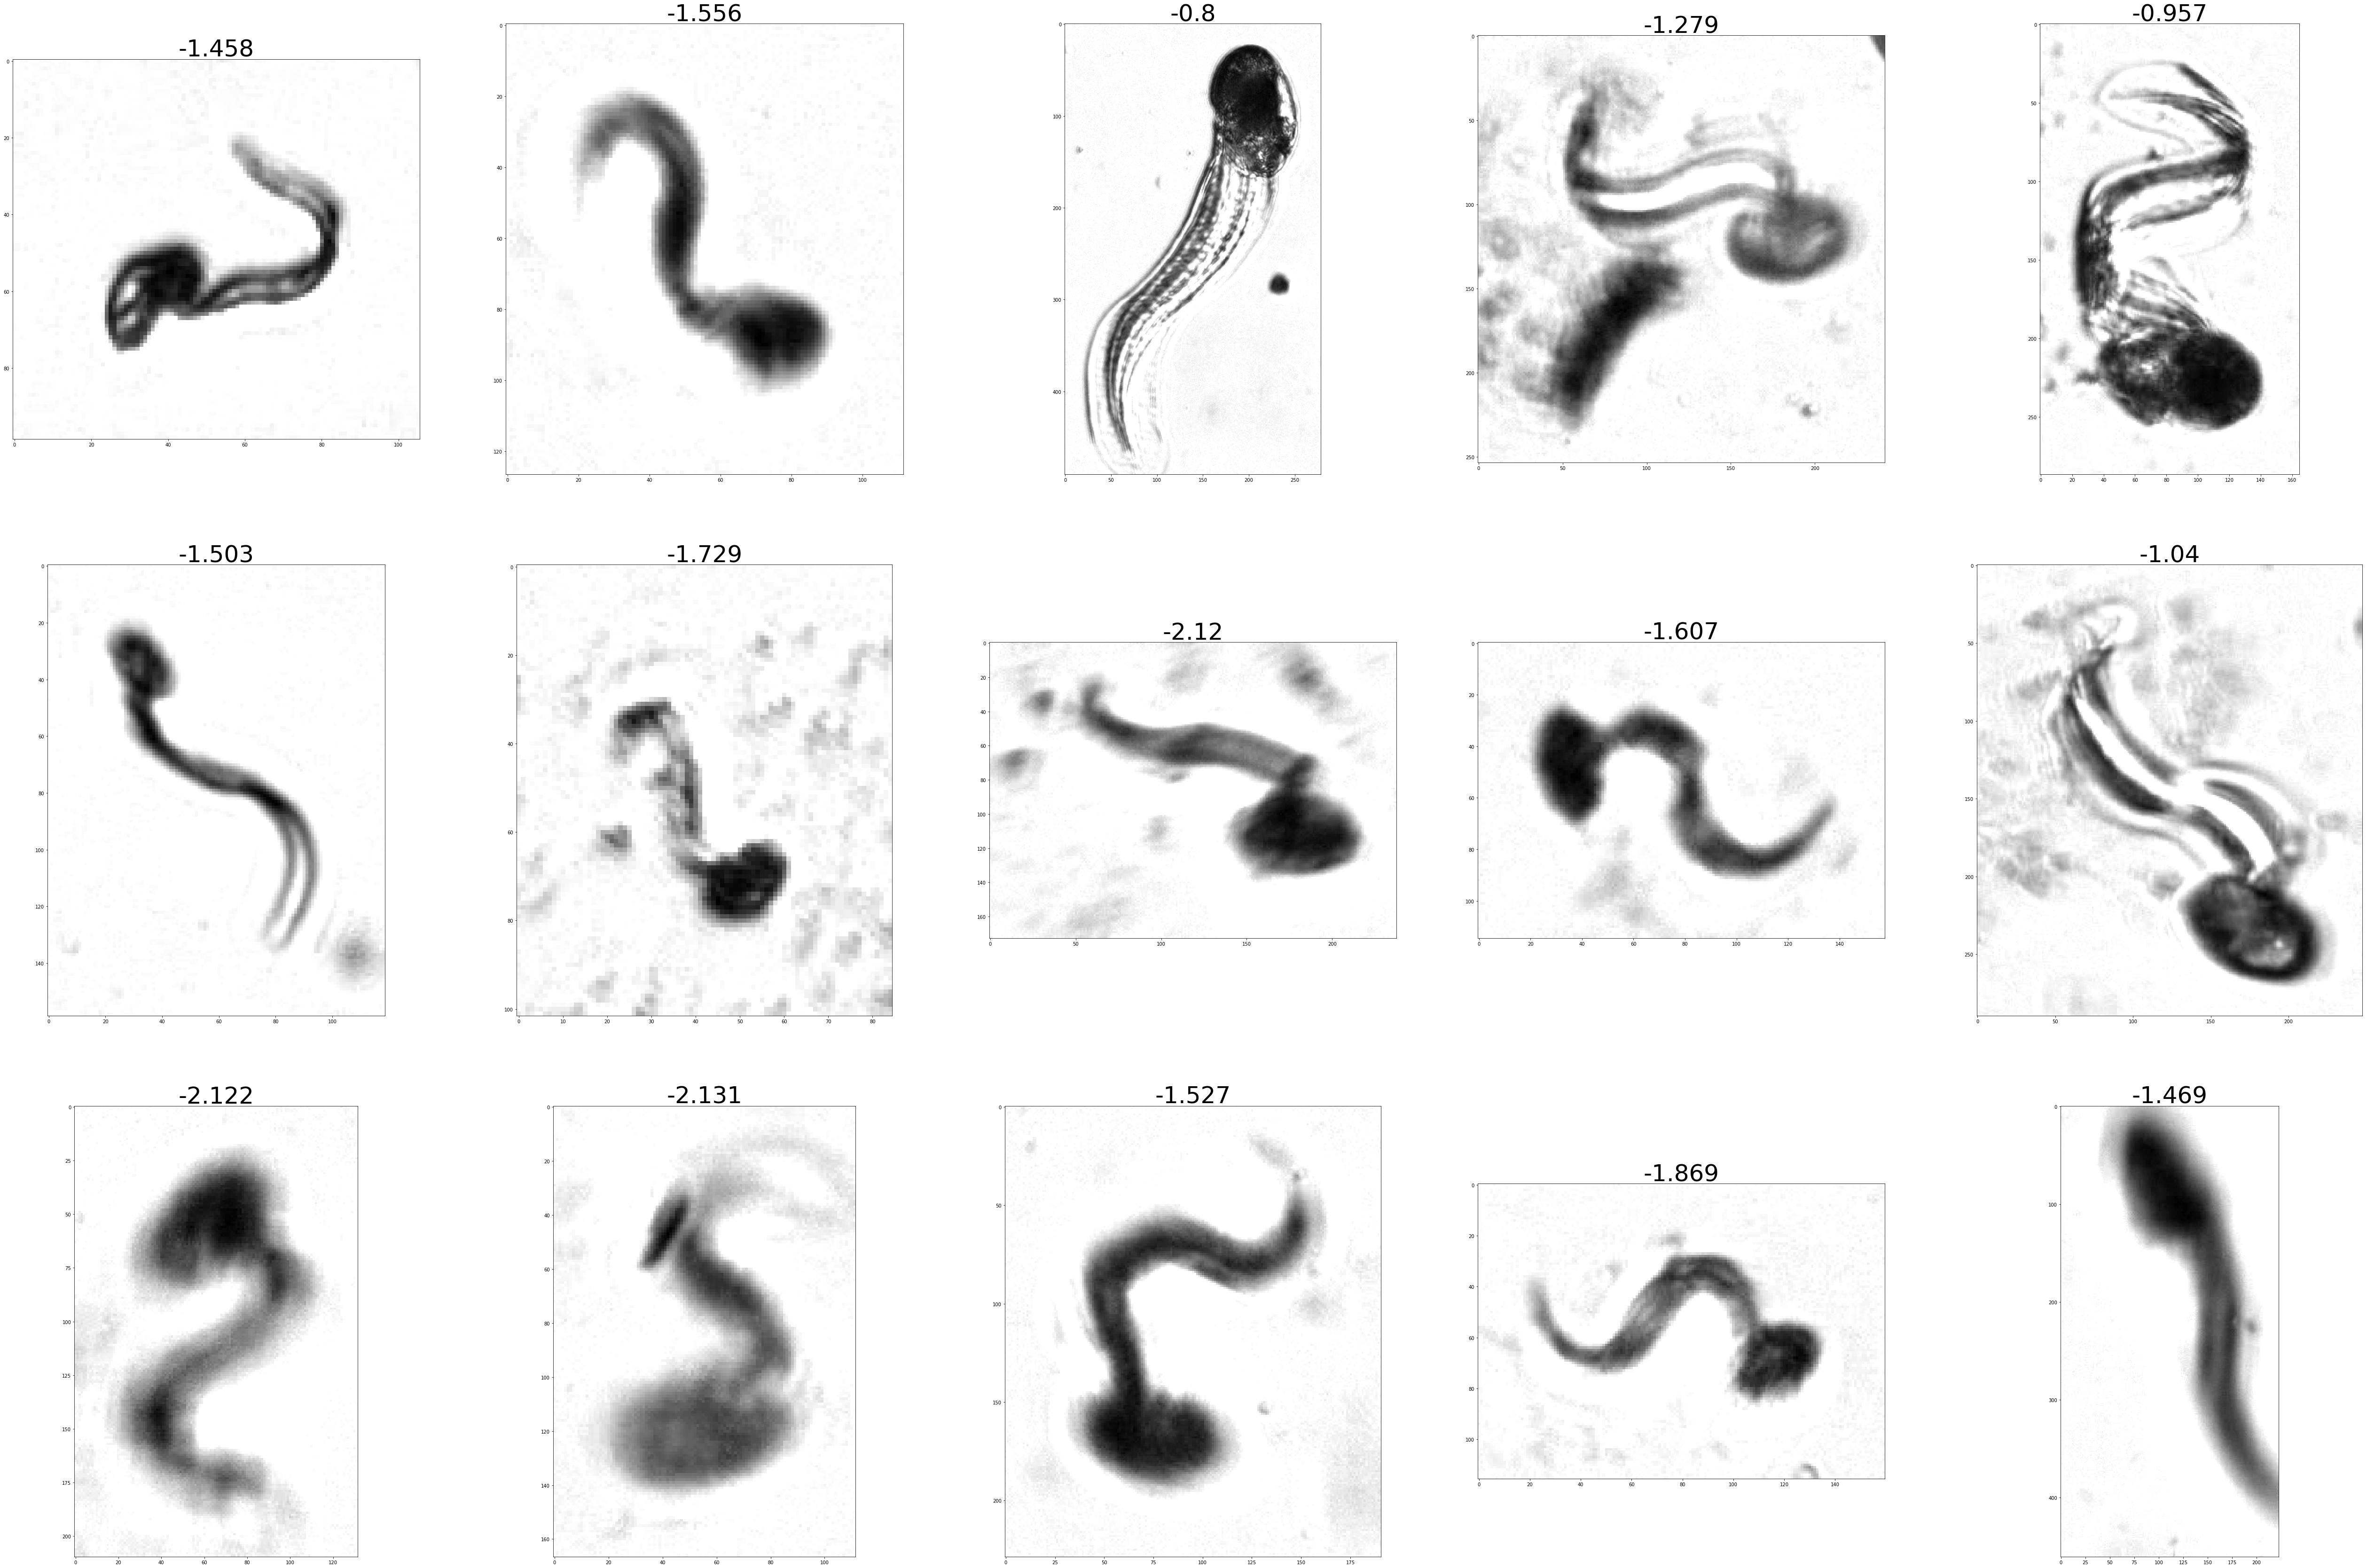

In [42]:
titles = data_log[data_log['predicted'] == classe][data_log['real'] == classe]['teng']
index = data_log[data_log['predicted'] == classe][data_log['real'] == classe].index
images = img_valid[index]
show_images(images[0:15], 3, titles[0:15].round(decimals=3))

C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


+ classe 0 :  (0,)
- classe 0 :  (0,)
+ classe 1 :  (2,)
- classe 1 :  (0,)
+ classe 2 :  (2,)
- classe 2 :  (0,)
+ classe 3 :  (4,)
- classe 3 :  (0,)
+ classe 4 :  (0,)
- classe 4 :  (0,)
+ classe 5 :  (0,)
- classe 5 :  (2,)
+ classe 6 :  (1,)
- classe 6 :  (0,)
+ classe 7 :  (22,)
- classe 7 :  (6,)
+ classe 8 :  (16,)
- classe 8 :  (9,)
+ classe 9 :  (5,)
- classe 9 :  (0,)
+ classe 10 :  (6,)
- classe 10 :  (2,)
+ classe 11 :  (0,)
- classe 11 :  (0,)
+ classe 12 :  (10,)
- classe 12 :  (2,)
+ classe 13 :  (13,)
- classe 13 :  (1,)
+ classe 14 :  (3,)
- classe 14 :  (0,)
+ classe 15 :  (1,)
- classe 15 :  (0,)
+ classe 16 :  (0,)
- classe 16 :  (0,)
+ classe 17 :  (13,)
- classe 17 :  (3,)
+ classe 18 :  (1,)
- classe 18 :  (1,)


KeyError: 0

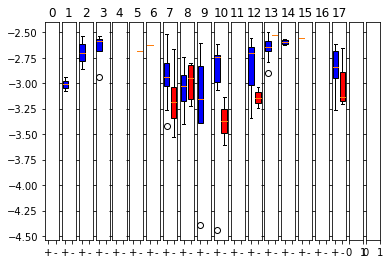

In [56]:
f, a = plt.subplots(1,20, sharex=False, sharey=True)

colors = ['blue', 'red']

soma_true = 0;
soma_false = 0;

for i in range(20):
    j = i
    box_true = data_log[data_log['predicted'] == i][data_log['real'] == i][data_log['teng'] < -2.5]['teng']
    print("+ classe" , i , ": ", np.shape(box_true))
    soma_true = soma_true + np.shape(box_true)[0]
    box_false = data_log[data_log['predicted'] != i][data_log['real'] == i][data_log['teng'] < -2.5]['teng']
    print("- classe" , i , ": ", np.shape(box_false))
    soma_false = soma_false + np.shape(box_false)[0]
    bplot = a[i].boxplot([box_true, box_false], widths=0.8, labels=['+', '-'],patch_artist=True)
    a[i].set_title(i)

    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        
f.subplots_adjust(hspace=0)
print(soma_true)
print(soma_false)
print(soma_true + soma_false)
plt.show()

C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


loading 0
loading 1
loading 2
loading 3
loading 4
loading 5
loading 6
loading 7
loading 8
loading 9
loading 10
loading 11
loading 12
loading 13
loading 14
loading 15
loading 16
loading 17
loading 18
loading 19


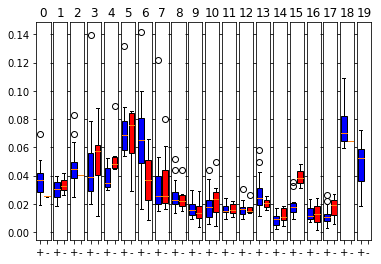

In [21]:
f, a = plt.subplots(1,20, sharex=False, sharey=True)

colors = ['blue', 'red']

for i in range(20):
    j = i
    box_true = data[data['predicted'] == j][data['real'] == j]['gblvar']
    box_false = data[data['predicted'] != j][data['real'] == j]['gblvar']
    print("loading", j)
    bplot = a[i].boxplot([box_true, box_false], widths=0.8, labels=['+', '-'],patch_artist=True)
    a[i].set_title(j)

    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        
f.subplots_adjust(hspace=0)
plt.show()

In [ ]:
fig, ax = plt.subplots()
plt.scatter(measures_log[:,0], measures_log[:,1], c=true_false, s=0.5, cmap='bwr_r')
plt.colorbar()
ax.set_xlabel('Variance of Laplacian')
ax.set_ylabel('Modified Laplacian')

In [ ]:
fig1, ax1 = plt.subplots()
plt.scatter(measures_log[:,0], measures_log[:,2], c=true_false, s=0.5, cmap='bwr_r')
plt.colorbar()
ax1.set_xlabel('Variance of Laplacian')
ax1.set_ylabel('Tenengrad')

In [ ]:
fig2, ax2 = plt.subplots()
plt.scatter(measures_log[:,1], measures_log[:,2], c=true_false, s=0.5, cmap='bwr_r')
plt.colorbar()
ax2.set_xlabel('Modified Laplacian')
ax2.set_ylabel('Tenengrad')

In [ ]:
fig3, ax3 = plt.subplots()
plt.scatter(measures_log[:,0], true_false, s=0.6)

ax3.set_xlabel('Variance of Laplacian')
ax3.set_ylabel('Predições negativas e positivas')

In [ ]:
fig3, ax3 = plt.subplots()
plt.scatter(measures_log[:,1], true_false, s=0.5)

ax3.set_xlabel('Modified Laplacian')
ax3.set_ylabel('Predições positivas')

In [ ]:
fig3, ax3 = plt.subplots()
plt.scatter(measures_log[:,2], true_false, s=0.5)

ax3.set_xlabel('Tenengrad')
ax3.set_ylabel('Predições positivas')

In [ ]:
predicted_labels = np.load("./laps_nobg_100/predictions.npy")
#predicted_labels = np.argmax(predictions, axis=1)

real_labels = np.load("./laps_nobg_100/real_labels.npy")

measures = np.load("focus_valid_laps.npy")

data = pd.DataFrame({'real':real_labels, 'predicted':predicted_labels, 'lapv':measures[:,0], 'lapm':measures[:,1], 'teng':measures[:,2], 'gblvar':measures[:,3], 'totvar':measures[:,4]})

data 

In [ ]:
f, a = plt.subplots(1,20, sharex=False, sharey=True)

for i in range(20):
    box_true = data[data['predicted'] == i][data['real'] == i]['gblvar']
    box_false = data[data['predicted'] != i][data['real'] == i]['gblvar']
    a[i].boxplot([box_true, box_false], widths=1, labels=['+', '-'])
    a[i].set_title(i)
    
f.subplots_adjust(hspace=0)
plt.show()


In [ ]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']]['lapv']
box_false = data[data['predicted'] != data['real']]['lapv']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('total')
    
f.subplots_adjust(hspace=0)
plt.show()

In [ ]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']]['lapm']
box_false = data[data['predicted'] != data['real']]['lapm']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('total')
    
f.subplots_adjust(hspace=0)
plt.show()

In [ ]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']]['teng']
box_false = data[data['predicted'] != data['real']]['teng']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('total')
    
f.subplots_adjust(hspace=0)
plt.show()

In [ ]:
true_false = np.zeros(len(real_labels), dtype=int)
for i in range(len(real_labels)):
    if predicted_labels[i] == real_labels[i]:
        true_false[i] = 1
measures_log = np.log(measures)

fig10, ax10 = plt.subplots()
plt.scatter(measures_log[:,0], measures_log[:,1], c=true_false, s=0.5, cmap='bwr_r')
plt.colorbar()
ax10.set_xlabel('Variance of Laplacian')
ax10.set_ylabel('Modified Laplacian')

In [ ]:
fig2, ax2 = plt.subplots()
plt.scatter(measures_log[:,1], measures_log[:,2], c=true_false, s=0.5, cmap='bwr_r')
plt.colorbar()
ax2.set_xlabel('Modified Laplacian')
ax2.set_ylabel('Tenengrad')

In [ ]:
print(data.iloc[1])
plt.imshow(img_valid[1], cmap='gray')
plt.show

In [ ]:
print(data.iloc[22])
plt.imshow(img_valid[22], cmap='gray')
plt.show

In [ ]:
print(data.iloc[5])
plt.imshow(img_valid[5], cmap='gray')
plt.show

In [ ]:
print(data.iloc[512])
plt.imshow(img_valid[512], cmap='gray')
plt.show

In [ ]:
print(data.iloc[506])
plt.imshow(img_valid[506], cmap='gray')
plt.show

In [ ]:
import scipy.ndimage

In [ ]:
gblvar = scipy.ndimage.uniform_filter(img_valid[1])

In [ ]:
gblvar


In [ ]:
np.var(gblvar)